In [1]:
%matplotlib inline


# Editing BEM surfaces in Blender

Sometimes when creating a BEM model the surfaces need manual correction because
of a series of problems that can arise (e.g. intersection between surfaces).
Here, we will see how this can be achieved by exporting the surfaces to the 3D
modeling program `Blender <https://blender.org>`_, editing them, and
re-importing them.

This tutorial is based on https://github.com/ezemikulan/blender_freesurfer by
Ezequiel Mikulan.


In [2]:
# Authors: Marijn van Vliet <w.m.vanvliet@gmail.com>
#          Ezequiel Mikulan <e.mikulan@gmail.com>
#
# License: BSD (3-clause)


import os
import os.path as op
import shutil
import mne

data_path = mne.datasets.sample.data_path()
subject = 'sample' # Rick Licona
subjects_dir = op.join(data_path, 'subjects')
bem_dir = op.join(subjects_dir, 'sample', 'bem')

In [6]:
subjects_dir

'/Users/ricklicona/mne_data/MNE-sample-data/subjects'

## Visualizing surfaces

The easier way to visualizing intersections between surfaces (i.e., inner skull, outer skull, and outer skin) is with mne.viz.plot_bem, savefig will save them in the folder named plots.  

Using surface: /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/bem/inner_skull.surf
Using surface: /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/bem/outer_skull.surf
Using surface: /Users/ricklicona/mne_data/MNE-sample-data/subjects/sample/bem/outer_skin.surf


/Users/ricklicona/PycharmProjects/AI-Neuro/lib/python3.7/site-packages/mne/viz/utils.py:111: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists 

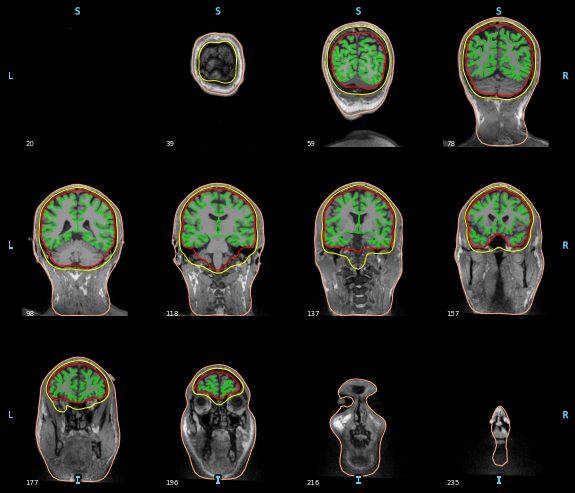

In [9]:
# Plot the inner skull, outer skull, and outer skin surfaces
bem_surfaces = mne.viz.plot_bem(subject=subject, subjects_dir=subjects_dir,
                                brain_surfaces='white', orientation='coronal')

# Create the 'plot' folder
plots_dir = op.join(subjects_dir, 'sample', 'plots')
os.makedirs(plots_dir, exist_ok=True)

# Save the plots
plot_name = op.join(plots_dir, "%s_BEM" % (subject))
bem_surfaces.savefig(plot_name, format='eps')

## Exporting surfaces to Blender

In this tutorial, we are working with the MNE-Sample set, for which the
surfaces have no issues. To demonstrate how to fix problematic surfaces, we
are going to manually place one of the inner-skull vertices outside the
outer-skill mesh.

We then convert the surfaces to `.obj
<https://en.wikipedia.org/wiki/Wavefront_.obj_file>`_ files and create a new
folder called ``conv`` inside the FreeSurfer subject folder to keep them in.



In [10]:
# Put the converted surfaces in a separate 'conv' folder
conv_dir = op.join(subjects_dir, 'sample', 'conv')
os.makedirs(conv_dir, exist_ok=True)

# Load the inner skull surface and create a problem
coords, faces = mne.read_surface(op.join(bem_dir, 'inner_skull.surf'))
coords[0] *= 1.1  # Move the first vertex outside the skull

# Write the inner skull surface as an .obj file that can be imported by
# Blender.
mne.write_surface(op.join(conv_dir, 'inner_skull.obj'), coords, faces,
                  overwrite=True)

# Also convert the outer skull surface.
coords, faces = mne.read_surface(op.join(bem_dir, 'outer_skull.surf'))
mne.write_surface(op.join(conv_dir, 'outer_skull.obj'), coords, faces,
                  overwrite=True)

## Editing in Blender

We can now open Blender and import the surfaces. Go to *File > Import >
Wavefront (.obj)*. Navigate to the ``conv`` folder and select the file you
want to import. Make sure to select the *Keep Vert Order* option. You can
also select the *Y Forward* option to load the axes in the correct direction
(RAS):

<img src="file://../../_static/blender_import_obj/blender_import_obj1.jpg" width="800" alt="Importing .obj files in Blender">

For convenience, you can save these settings by pressing the ``+`` button
next to *Operator Presets*.

Repeat the procedure for all surfaces you want to import (e.g. inner_skull
and outer_skull).

<img src="file://../../_static/blender_import_obj/blender_import_obj2.jpg" width="800" alt="Editing surfaces in Blender">

## Using the fixed surfaces in MNE-Python

In Blender, you can export a surface as an .obj file by selecting it and go
to *File > Export > Wavefront (.obj)*. You need to again select the *Y
Forward* option and check the *Keep Vertex Order* box.

<img src="file://../../_static/blender_import_obj/blender_import_obj3.jpg" width="200" alt="Exporting .obj files in Blender">


Each surface needs to be exported as a separate file. We recommend saving
them in the ``conv`` folder and ending the file name with ``_fixed.obj``,
although this is not strictly necessary.

In [ ]:
AGREGAR IMAGEBES MAS EXPLICIITAS DE BLENDER 

In [ ]:
In order to be able to run this tutorial script top to bottom, we here
simulate the edits you did manually in Blender using Python code:


In [ ]:
coords, faces = mne.read_surface(op.join(conv_dir, 'inner_skull.obj'))
coords[0] /= 1.1  # Move the first vertex back inside the skull
mne.write_surface(op.join(conv_dir, 'inner_skull_fixed.obj'), coords, faces,
                  overwrite=True)

Back in Python, you can read the fixed .obj files and save them as
FreeSurfer .surf files. For the :func:`mne.make_bem_model` function to find
them, they need to be saved using their original names in the ``surf``
folder, e.g. ``surf/inner_skull.surf``. Be sure to first backup the original
surfaces in case you make a mistake!



In [ ]:
# Read the fixed surface
coords, faces = mne.read_surface(op.join(conv_dir, 'inner_skull_fixed.obj'))

# Backup the original surface
shutil.copy(op.join(bem_dir, 'inner_skull.surf'),
            op.join(bem_dir, 'inner_skull_orig.surf'))

# Overwrite the original surface with the fixed version
mne.write_surface(op.join(bem_dir, 'inner_skull.surf'), coords, faces,
                  overwrite=True)

That's it! You are ready to continue with your analysis pipeline (e.g.
running :func:`mne.make_bem_model`).

